In this notebook we'll have a look at some exemplary coordinate reference systems for geospatial data.

When working with geospatial data we usually want to simplify the analysis and work with data in a 2D setting with 2D maps. However, any point of the surface of the earth is actually a point on a 3D shape. Hence, in order to get from 3D to 2D we need to do some kind of transformation (mapping, projection). 

I think a pretty helpful way to think about this problem is described nicely in an [ESRI blog post](https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/gcs_vs_pcs/):

"Imagine peeling an orange and trying to lay the peel flat on a table. You can get close, but only if you start tearing the peel apart. This is where map projections come in. They tell you how to distort the earth—how to tear and stretch that orange peel—so the parts that are most important to your map get the least distorted and are displayed b
est on the flat surface of the map."

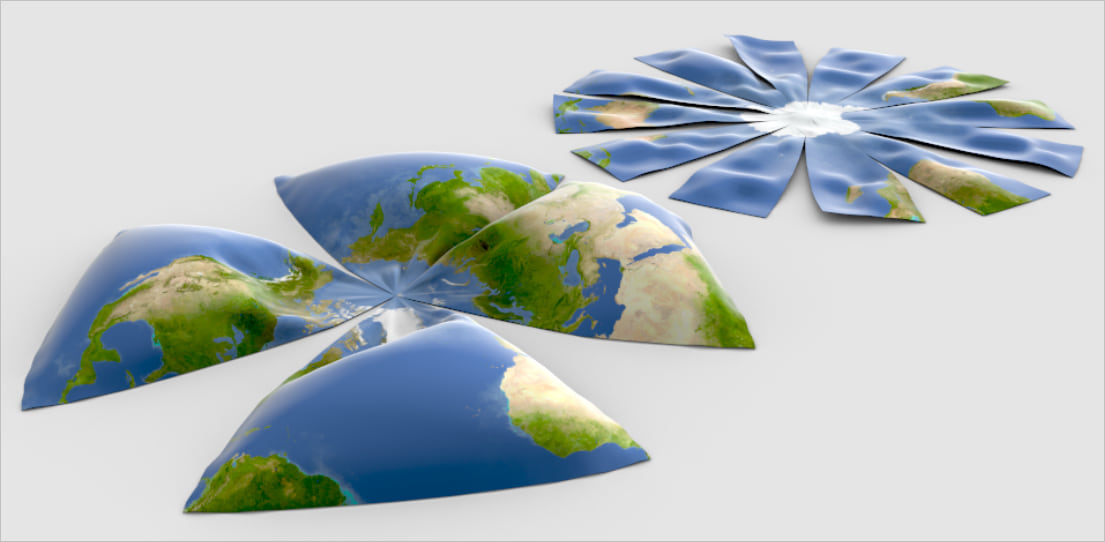

Image source: https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/gcs_vs_pcs/

There are infinitely many ways to peel an orange. Similarly, there is not just one way to map the 3D earth surface into 2D. Different transformations come with different advantages and disadvantages. Each transformation defines a coordinate reference system (CRS). They differ with regards to:

- units: are points given in latitude / longitude or in meters
- distances: some will distort distances, such that individual countries can appear larger than they really are
- local / global: some CRSs are optimized for local applications, some for global applications
- use cases: e.g. some early CRSs where optimized for navigation. The shortest way between two points could either show as a straight line on a map or as an arc

To get a better feeling for these differences, let's visualize some CRSs. For this, we will plot a world map based on country boundaries together with graticules (representing latitudes and longitudes) for each CRS. The data is taken from https://www.naturalearthdata.com/downloads/110m-physical-vectors/. The examples are somewhat adapted from https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/intro-to-coordinate-reference-systems-python/.

First, let's load the data. We will load them from local paths. In order to replicate this, you will first need to download the files.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
world_boundaries = gpd.read_file('../../data/external/ne_110m_land/ne_110m_land.shp')
graticule = gpd.read_file('../../data/external/ne_110m_graticules_all/ne_110m_graticules_15.shp')

Let's define some CRSs in a dictionary. The dictionary keys are name / description of the CRS, the values are projection strings that can be used with geopandas.

In [ ]:
crs_list = {'WGS 84 - World Geodetic System 1984, used in GPS (EPSG:4326)': '+proj=longlat +datum=WGS84 +no_defs +type=crs',
            'Adams Square II': '+proj=adams_ws2 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs',
            'Azimuthal equidistant': '+proj=aeqd +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +R=6371000 +units=m +no_defs +type=crs',
            'Aitoff': '+proj=aitoff +lon_0=0 +x_0=0 +y_0=0 +R=6371000 +units=m +no_defs +type=crs',
            'Robinson': '+proj=robin +lon_0=0 +x_0=0 +y_0=0 +R=6371000 +units=m +no_defs +type=crs'}

Now let's visualize our data for each CRS:

In [ ]:
for this_key in crs_list.keys():
    
    this_proj_str = crs_list[this_key]
    
    # reproject to crs
    world_boundaries_reproj = world_boundaries.to_crs(this_proj_str)
    graticule_reproj = graticule.to_crs(this_proj_str)
    
    # get crs type
    crs_type = world_boundaries_reproj.crs.type_name
    
    # visualize
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))

    graticule_reproj.plot(ax=ax, color='lightgrey')
    world_boundaries_reproj.plot(ax=ax, color='black')

    # title and axes labels
    ax.set(title=f"{this_key} - {crs_type}");